In [1]:
#%matplotlib widget

import sys
sys.path.append('../canadian_extreme_precip/')

import calendar
import datetime as dt

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib as mpl

from reader import read_combined_file
from filepath import COMBINED_PATH
from plotting import plot_climatology, monthly_series
from utils import to_monthly, to_climatology

Get paths for combined station datasets and put into a dictionary with station name as keys.

In [2]:
station_files = {}
for f in COMBINED_PATH.glob('*combined.csv'):
    station_name = ' '.join(f.stem.split('.')[0].split('_'))
    station_files[station_name] = f
    
print(station_files)

{'cape dyer': PosixPath('/home/apbarret/Data/Rain_on_snow/Canada_extreme_precip/Combined_files/cape_dyer.combined.csv'), 'resolute bay': PosixPath('/home/apbarret/Data/Rain_on_snow/Canada_extreme_precip/Combined_files/resolute_bay.combined.csv'), 'eureka': PosixPath('/home/apbarret/Data/Rain_on_snow/Canada_extreme_precip/Combined_files/eureka.combined.csv'), 'alert': PosixPath('/home/apbarret/Data/Rain_on_snow/Canada_extreme_precip/Combined_files/alert.combined.csv'), 'clyde river': PosixPath('/home/apbarret/Data/Rain_on_snow/Canada_extreme_precip/Combined_files/clyde_river.combined.csv'), 'pond inlet': PosixPath('/home/apbarret/Data/Rain_on_snow/Canada_extreme_precip/Combined_files/pond_inlet.combined.csv'), 'cambridge bay': PosixPath('/home/apbarret/Data/Rain_on_snow/Canada_extreme_precip/Combined_files/cambridge_bay.combined.csv'), 'hall beach': PosixPath('/home/apbarret/Data/Rain_on_snow/Canada_extreme_precip/Combined_files/hall_beach.combined.csv'), 'sachs harbour': PosixPath('/ho

For each station calculate climatologies.

- Plot time series of monthly mean values
- Plot climatologies

In [3]:
name = 'resolute bay'
f = station_files[name]
df = read_combined_file(f)
df.head()

,x,y,STATION_NAME,CLIMATE_IDENTIFIER,ID,PROVINCE_CODE,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MEAN_TEMPERATURE,...,SPEED_MAX_GUST,SPEED_MAX_GUST_FLAG,COOLING_DEGREE_DAYS,COOLING_DEGREE_DAYS_FLAG,HEATING_DEGREE_DAYS,HEATING_DEGREE_DAYS_FLAG,MIN_REL_HUMIDITY,MIN_REL_HUMIDITY_FLAG,MAX_REL_HUMIDITY,MAX_REL_HUMIDITY_FLAG
1947-10-01,-94.969444,74.716944,RESOLUTE CARS,2403500.0,2403500.1947.10.1,NU,1947.0,10.0,1.0,-5.9,...,NaN,NaN,0.0,NaN,23.9,NaN,NaN,NaN,NaN,NaN
1947-10-02,-94.969444,74.716944,RESOLUTE CARS,2403500.0,2403500.1947.10.2,NU,1947.0,10.0,2.0,-10.6,...,NaN,NaN,0.0,NaN,28.6,NaN,NaN,NaN,NaN,NaN
1947-10-03,-94.969444,74.716944,RESOLUTE CARS,2403500.0,2403500.1947.10.3,NU,1947.0,10.0,3.0,-13.4,...,NaN,NaN,0.0,NaN,31.4,NaN,NaN,NaN,NaN,NaN
1947-10-04,-94.969444,74.716944,RESOLUTE CARS,2403500.0,2403500.1947.10.4,NU,1947.0,10.0,4.0,-17.8,...,NaN,NaN,0.0,NaN,35.8,NaN,NaN,NaN,NaN,NaN
1947-10-05,-94.969444,74.716944,RESOLUTE CARS,2403500.0,2403500.1947.10.5,NU,1947.0,10.0,5.0,-16.1,...,NaN,NaN,0.0,NaN,34.1,NaN,NaN,NaN,NaN,NaN


For now, I'm going to work with a few variables.

In [4]:
df_mon = to_monthly(df)
df_mon

,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,TOTAL_PRECIPITATION,TOTAL_RAIN,TOTAL_SNOW,SNOW_ON_GROUND
1947-10-31,-11.932258,-15.035484,-8.767742,15.4,0.0,15.4,NaN
1947-11-30,NaN,-21.876667,NaN,12.2,0.0,12.2,NaN
1947-12-31,-25.000000,-29.100000,-20.864516,1.0,0.0,1.0,NaN
1948-01-31,-30.954839,-34.680645,-27.190323,0.8,0.0,0.8,NaN
1948-02-29,-37.672414,-40.931034,-34.379310,3.4,0.0,3.4,NaN
...,...,...,...,...,...,...,...
2021-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,NaN,NaN,NaN,14.0,13.8,0.2,NaN
2021-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_clm = to_climatology(df_mon)
df_clm

,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,TOTAL_PRECIPITATION,TOTAL_RAIN,TOTAL_SNOW,SNOW_ON_GROUND
1,-31.876890,-35.368416,-28.336591,3.658209,0.000000,3.994030,1.000000
2,-32.947439,-36.388109,-29.432766,3.567164,0.000000,3.802899,1.000000
3,-30.714392,-34.227540,-27.138015,4.892424,0.042424,5.119697,0.999480
4,-22.524412,-26.213575,-18.764559,5.932353,0.017647,6.297015,1.000000
5,-10.593255,-13.691105,-7.440154,8.165714,0.262857,9.184286,0.999471
6,-0.027198,-2.301353,2.243623,13.855072,6.910448,7.160294,0.796667
7,4.434583,1.650865,7.141795,25.841176,21.848529,3.521429,0.085293
8,2.317952,-0.025386,4.634128,31.531944,23.501429,7.718571,0.080645
9,-4.526715,-6.592126,-2.419227,20.904412,4.681818,17.230435,0.615254
10,-14.310063,-17.345787,-11.224795,14.538235,0.242424,16.300000,0.986472


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

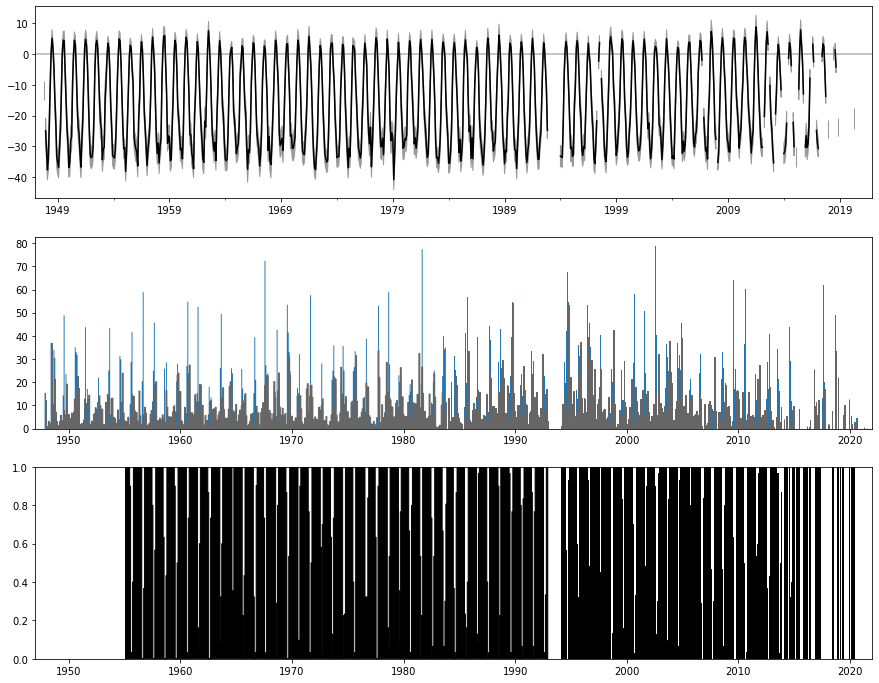

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(15,12))
monthly_series(df_mon, ax=ax)

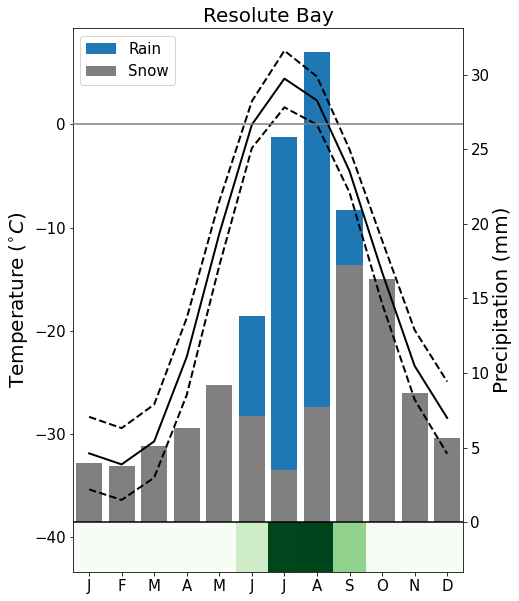

In [7]:
fig, ax = plt.subplots(figsize=(7, 10))
plot_climatology(df_clm, ax=ax, title=name);